### Question
#### *List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.*

---

## Solution for this problem

### **Steps to Calculate Top 10 States by CAGR (2022–2024)**

1. **Filter the Data for Relevant Years**

   * Keep only rows where `year` is 2022 or 2024.
   * Make sure the sales column contains total vehicles sold (not EV-only, unless the question specifies EVs).

2. **Aggregate Sales by State and Year**

   * Group by `state` and `year`.
   * Sum the `total_vehicles_sold` for each combination.

3. **Pivot or Reshape the Data**

   * Make a table where each row is a state and columns are `2022_sales` and `2024_sales`.

4. **Apply the CAGR Formula**
   For each state:

   $$
   \text{CAGR} = \left( \frac{\text{Sales in 2024}}{\text{Sales in 2022}} \right)^{\frac{1}{n}} - 1
   $$

   Here, $n = 2$ years (from 2022 to 2024).

5. **Handle Missing or Zero Values**

   * If a state has `2022_sales = 0`, you can either:

     * Skip it (CAGR undefined), or
     * Use a special note (infinite growth) if your context allows.

6. **Sort the Results**

   * Sort by `CAGR` in descending order.

7. **Select Top 10 States**

   * Pick the first 10 states after sorting.

8. **Format the Output**

   * Show a table with `state`, `2022_sales`, `2024_sales`, and `CAGR (%)`.

In [1]:
# Importing necessary libraries for data manupulation and data visualizaion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from IPython.display import display

In [2]:
# Load a state based ev sales dataframe
state_sales = pd.read_csv("../../data/processed/ev_sales_by_state_enhanced_20250806.csv")

# display the first 5 dataset from state_sales
display(state_sales.head())

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
0,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,515,0.000000
1,2021-04-01,2021,4,2,3,9.0,0.0,5.36,1.850028,0.14,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,9,168,0.053571
2,2021-04-01,2021,4,2,3,436.0,0.0,0.69,0.524729,6.90,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,436,63444,0.006872
3,2021-04-01,2021,4,2,3,26.0,0.0,0.33,0.285179,0.41,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,26,7837,0.003318
4,2021-04-01,2021,4,2,3,0.0,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,1256,0.000000


In [3]:
# Filtering out the dataset
state_sales_filtered = state_sales.loc[state_sales['year'].isin([2022, 2024])]

display(state_sales_filtered)

,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_ev_growth_rate,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate
611,2022-01-01,2022,1,1,12,0.000000,0.00,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,2-Wheelers,0,336,0.000000
612,2022-01-01,2022,1,1,12,0.333333,-1.00,0.00,0.000000,0.00,...,0,0,0,0,0,Andaman and Nicobar Islands,4-Wheelers,0,90,0.000000
613,2022-01-01,2022,1,1,12,1256.666667,0.70,2.80,1.335001,5.28,...,0,0,0,0,0,Andhra Pradesh,2-Wheelers,1671,59712,0.027984
614,2022-01-01,2022,1,1,12,31.333333,-0.06,0.34,0.292670,0.09,...,0,0,0,0,0,Andhra Pradesh,4-Wheelers,29,8418,0.003445
615,2022-01-01,2022,1,1,12,0.000000,0.00,0.00,0.000000,0.00,...,0,0,0,0,0,Arunachal Pradesh,2-Wheelers,0,950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2024-03-01,2024,3,1,38,394.000000,-0.01,1.13,0.756122,0.28,...,0,0,0,0,0,Uttar Pradesh,4-Wheelers,389,34425,0.011300
2441,2024-03-01,2024,3,1,38,515.666667,-0.01,4.63,1.728109,0.42,...,0,0,0,0,0,Uttarakhand,2-Wheelers,579,12506,0.046298
2442,2024-03-01,2024,3,1,38,53.333333,-0.15,1.06,0.722706,0.04,...,0,0,0,0,0,Uttarakhand,4-Wheelers,51,4812,0.010599
2443,2024-03-01,2024,3,1,38,1712.000000,0.61,3.09,1.408545,1.56,...,0,0,0,0,0,West Bengal,2-Wheelers,2159,69871,0.030900


In [4]:
# state_sales_filtered['state'] = state_sales_filtered['state'].replace({
#   'Andaman & Nicobar Island': 'Andaman & Nicobar'
# })

# Aggregate Sales by state and year
state_sales_grouped = (
  state_sales_filtered.groupby(['state', 'year'], as_index=False)['total_vehicles_sold'].sum()
) 

display(state_sales_grouped)

,state,year,total_vehicles_sold
0,Andaman and Nicobar Islands,2022,6396
1,Andaman and Nicobar Islands,2024,1919
2,Andhra Pradesh,2022,732826
3,Andhra Pradesh,2024,201784
4,Arunachal Pradesh,2022,23242
...,...,...,...
63,Uttar Pradesh,2024,714658
64,Uttarakhand,2022,209101
65,Uttarakhand,2024,53903
66,West Bengal,2022,909792


In [5]:
state_sales_pivot = (
    state_sales_grouped.pivot(
      index='state',
      columns='year',
      values='total_vehicles_sold'
    )
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(state_sales_pivot)

year,state,sales_2022,sales_2024
0,Andaman and Nicobar Islands,6396,1919
1,Andhra Pradesh,732826,201784
2,Arunachal Pradesh,23242,6810
3,Assam,433527,147611
4,Bihar,983697,278461
5,Chandigarh,47879,8630
6,Chhattisgarh,432818,142456
7,Dadra and Nagar Haveli and Daman and Diu,14350,4098
8,Delhi,551880,155839
9,Goa,68010,20689


In [6]:
# Calculate CAGR ( n = 2years)
state_sales_pivot['CAGR'] = (
  (state_sales_pivot['sales_2024'] / state_sales_pivot['sales_2022']) ** (1/2) - 1
) * 100

display(state_sales_pivot)

year,state,sales_2022,sales_2024,CAGR
0,Andaman and Nicobar Islands,6396,1919,-45.224890
1,Andhra Pradesh,732826,201784,-47.526150
2,Arunachal Pradesh,23242,6810,-45.870152
3,Assam,433527,147611,-41.648599
4,Bihar,983697,278461,-46.795114
5,Chandigarh,47879,8630,-57.544607
6,Chhattisgarh,432818,142456,-42.629621
7,Dadra and Nagar Haveli and Daman and Diu,14350,4098,-46.560790
8,Delhi,551880,155839,-46.860710
9,Goa,68010,20689,-44.845194


In [7]:
# 5. Handle division by zero or missing data
state_sales_pivot = state_sales_pivot.dropna(subset=['sales_2022', 'sales_2024'])
state_sales_pivot = state_sales_pivot[state_sales_pivot['sales_2022'] > 0]

In [8]:
# 6. Sort by CAGR descending
state_cagr_top10 = state_sales_pivot.sort_values('CAGR', ascending=False).head(10)

In [9]:
state_cagr_top10

year,state,sales_2022,sales_2024,CAGR
23,Nagaland,14179,5483,-37.814902
25,Puducherry,49662,17503,-40.633131
3,Assam,433527,147611,-41.648599
6,Chhattisgarh,432818,142456,-42.629621
11,Haryana,618249,201143,-42.961151
15,Karnataka,1343234,430905,-43.361085
21,Meghalaya,30277,9628,-43.608763
29,Tamil Nadu,1566918,495075,-43.790158
22,Mizoram,24243,7420,-44.676612
9,Goa,68010,20689,-44.845194


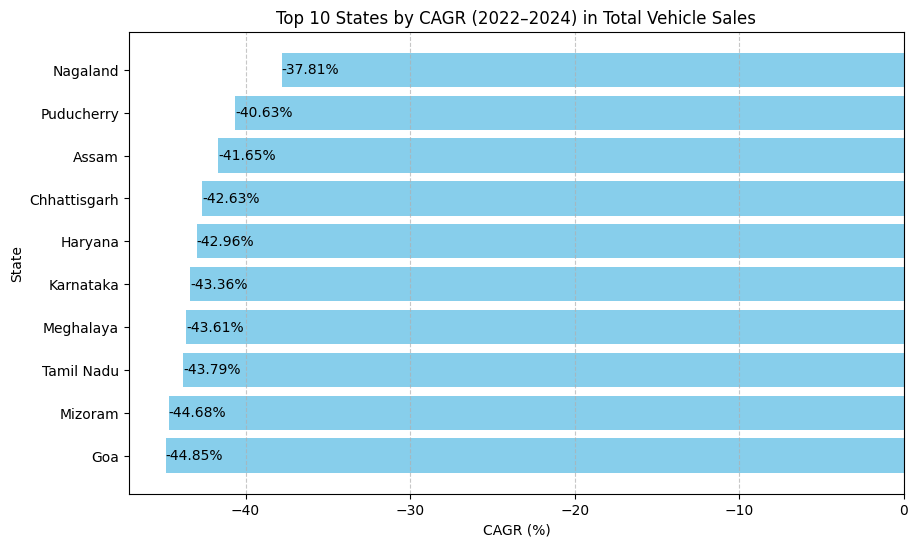

In [10]:
import matplotlib.pyplot as plt

# Sort again to plot in correct order
df_top10_sorted = state_cagr_top10.sort_values('CAGR')

plt.figure(figsize=(10,6))
plt.barh(df_top10_sorted['state'], df_top10_sorted['CAGR'], color='skyblue')
plt.xlabel('CAGR (%)')
plt.ylabel('State')
plt.title('Top 10 States by CAGR (2022–2024) in Total Vehicle Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Add labels to bars
for index, value in enumerate(df_top10_sorted['CAGR']):
    plt.text(value, index, f"{value:.2f}%", va='center')

plt.show()


Between 2022 and 2024, India’s overall vehicle sales market faced a slowdown, with most states registering a decline in compounded annual growth rate (CAGR). However, some states demonstrated relative resilience, managing to limit the drop more effectively than others.

Nagaland topped the list with the smallest decline at -37.81% CAGR, followed by Puducherry (-40.63%) and Assam (-41.65%). These states, while still experiencing contractions, outperformed the national trend and indicate regions where demand was relatively sustained despite broader market challenges.

Chhattisgarh, Haryana, and Karnataka also remained in the top 10 least-affected states, highlighting that economic stability, niche market demand, or specific policy support may have helped cushion the downturn.

For automotive stakeholders, this insight points toward states where market re-entry or targeted promotional strategies could recover sales faster once macroeconomic conditions improve.

>From 2022 to 2024, vehicle sales declined across all states, but some regions showed greater resilience. Nagaland led with the smallest drop at -37.81% CAGR, followed by Puducherry and Assam. These states outperformed the national trend, signaling pockets of stable demand despite market challenges. Targeted efforts here could yield quicker recovery compared to other regions."

### Let Get the CAGR of EV Vehicles from 2022 - 2024

In [11]:
ev_sal_state = state_sales_filtered.groupby(['year', 'state'])['electric_vehicles_sold'].sum().reset_index()


zero_counts = (ev_sal_state == 0).sum()
display(zero_counts)

ev_sal_state = ev_sal_state[ev_sal_state['electric_vehicles_sold'] != 0]

display(ev_sal_state.head())

display(ev_sal_state['year'].unique())

year                      0
state                     0
electric_vehicles_sold    2
dtype: int64

,year,state,electric_vehicles_sold
0,2022,Andaman and Nicobar Islands,23
1,2022,Andhra Pradesh,28050
2,2022,Arunachal Pradesh,2
3,2022,Assam,1984
4,2022,Bihar,10071


array([2022, 2024])

In [12]:
ev_state_pt = (
  ev_sal_state.pivot(index='state', columns='year', values='electric_vehicles_sold')
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(ev_state_pt.head())

year,state,sales_2022,sales_2024
0,Andaman and Nicobar Islands,23,11
1,Andhra Pradesh,28050,12638
2,Arunachal Pradesh,2,10
3,Assam,1984,1364
4,Bihar,10071,5401


In [13]:
# Calculate the CAGR of EV_sales
ev_state_pt['CAGR'] = (
  (
    (ev_state_pt['sales_2024'] / ev_state_pt['sales_2022']) ** (1/2) - 1 
  ) * 100
).round(2) # in %

display(ev_state_pt[ev_state_pt['CAGR'] > 0])

year,state,sales_2022,sales_2024,CAGR
2,Arunachal Pradesh,2,10,123.61
21,Meghalaya,33,49,21.85
22,Mizoram,36,138,95.79


In [14]:
# Handle division by zero
ev_state_pt = ev_state_pt.dropna(subset=['sales_2022', 'sales_2024'])
ev_state_pt = ev_state_pt.loc[ev_state_pt['sales_2022'] > 0]

In [15]:
# Sort by CAGR in decending order
top_10_ev_CAGR = ev_state_pt.sort_values(by='CAGR', ascending=False).head(10)

display(top_10_ev_CAGR)

year,state,sales_2022,sales_2024,CAGR
2,Arunachal Pradesh,2,10,123.61
22,Mizoram,36,138,95.79
21,Meghalaya,33,49,21.85
23,Nagaland,3,3,0.00
7,Dadra and Nagar Haveli and Daman and Diu,103,92,-5.49
30,Uttar Pradesh,23791,21206,-5.59
25,Puducherry,1454,1202,-9.08
9,Goa,5616,3875,-16.93
3,Assam,1984,1364,-17.08
5,Chandigarh,1129,763,-17.79


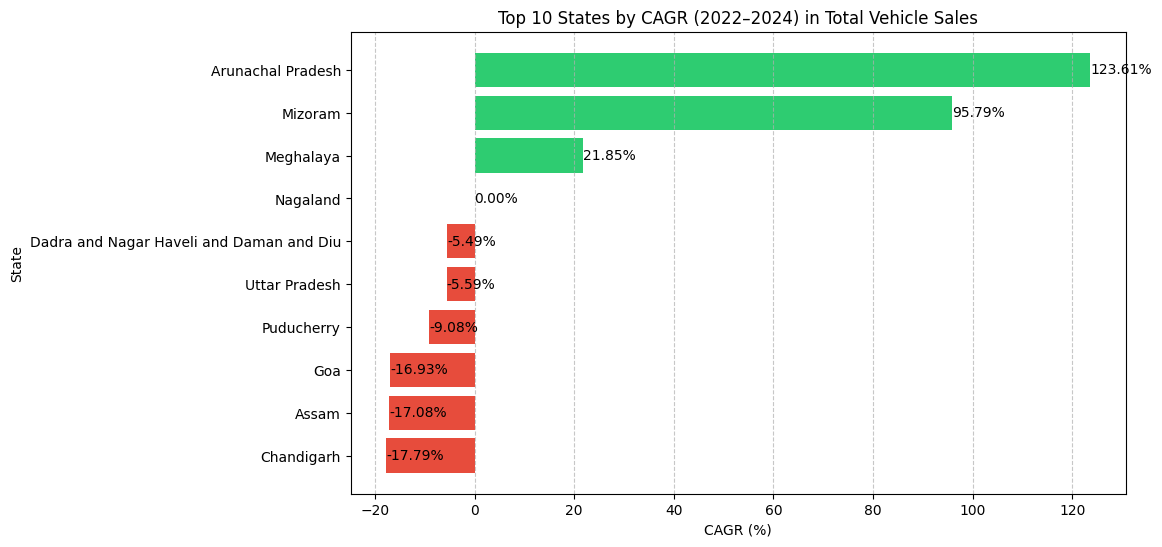

In [16]:
# Sort for plotting
df_top10_sorted = top_10_ev_CAGR.sort_values("CAGR")

# Create color mapping: green if positive, red if negative
colors = ["#2ecc71" if val > 0 else "#e74c3c" for val in df_top10_sorted["CAGR"]]

plt.figure(figsize=(10, 6))
plt.barh(df_top10_sorted["state"], df_top10_sorted["CAGR"], color=colors)
plt.xlabel("CAGR (%)")
plt.ylabel("State")
plt.title("Top 10 States by CAGR (2022–2024) in Total Vehicle Sales")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add labels to bars
for index, value in enumerate(df_top10_sorted["CAGR"]):
    plt.text(value, index, f"{value:.2f}%", va="center");

### Showing the top 10 listed state which having other then ev_sales CAGR

In [17]:
# Calculate non-EV sales by subtracting EV sales from total sales
state_sales_filtered['none_ev_sales'] = state_sales_filtered['total_vehicles_sold'] - state_sales_filtered['electric_vehicles_sold']

# Display rows where EV sales are greater than 0
display(state_sales_filtered.loc[state_sales_filtered['electric_vehicles_sold'] > 0])

# Display statistical summary of numeric columns
display(state_sales_filtered[['electric_vehicles_sold', 'none_ev_sales']].describe())

/tmp/ipykernel_248117/1335137374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_sales_filtered['none_ev_sales'] = state_sales_filtered['total_vehicles_sold'] - state_sales_filtered['electric_vehicles_sold']


,date,year,month,quarter,months_from_start,rolling_mean_ev,ev_growth_rate,ev_penetration,ev_penetration_log,national_market_share,...,is_missing_segment_preference_ratio,is_missing_segment_growth_diff,is_missing_regional_avg_penetration,is_missing_adoption_velocity,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration_rate,none_ev_sales
613,2022-01-01,2022,1,1,12,1256.666667,0.70,2.80,1.335001,5.28,...,0,0,0,0,Andhra Pradesh,2-Wheelers,1671,59712,0.027984,58041
614,2022-01-01,2022,1,1,12,31.333333,-0.06,0.34,0.292670,0.09,...,0,0,0,0,Andhra Pradesh,4-Wheelers,29,8418,0.003445,8389
617,2022-01-01,2022,1,1,12,101.666667,-0.01,0.35,0.300105,0.29,...,0,0,0,0,Assam,2-Wheelers,92,26097,0.003525,26005
619,2022-01-01,2022,1,1,12,493.333333,-0.12,0.80,0.587787,1.29,...,0,0,0,0,Bihar,2-Wheelers,409,51380,0.007960,50971
620,2022-01-01,2022,1,1,12,9.333333,0.43,0.18,0.165514,0.03,...,0,0,0,0,Bihar,4-Wheelers,10,5538,0.001806,5528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2024-03-01,2024,3,1,38,394.000000,-0.01,1.13,0.756122,0.28,...,0,0,0,0,Uttar Pradesh,4-Wheelers,389,34425,0.011300,34036
2441,2024-03-01,2024,3,1,38,515.666667,-0.01,4.63,1.728109,0.42,...,0,0,0,0,Uttarakhand,2-Wheelers,579,12506,0.046298,11927
2442,2024-03-01,2024,3,1,38,53.333333,-0.15,1.06,0.722706,0.04,...,0,0,0,0,Uttarakhand,4-Wheelers,51,4812,0.010599,4761
2443,2024-03-01,2024,3,1,38,1712.000000,0.61,3.09,1.408545,1.56,...,0,0,0,0,West Bengal,2-Wheelers,2159,69871,0.030900,67712


,electric_vehicles_sold,none_ev_sales
count,1018.000000,1018.000000
mean,968.531434,22987.290766
std,2354.167254,36515.381432
min,0.000000,-570.000000
25%,3.000000,1244.250000
50%,61.000000,6237.500000
75%,658.250000,29333.750000
max,26668.000000,276423.000000


In [18]:
df_grouped = state_sales_filtered.groupby(['year', 'state'], as_index=False)['none_ev_sales'].sum()

display(df_grouped.head())

,year,state,none_ev_sales
0,2022,Andaman and Nicobar Islands,6373
1,2022,Andhra Pradesh,704776
2,2022,Arunachal Pradesh,23240
3,2022,Assam,431543
4,2022,Bihar,973626


In [19]:
# pivot
df_pivot = (
  df_grouped.pivot(index='state', columns='year', values='none_ev_sales')
  .rename(columns={2022: 'sales_2022', 2024: 'sales_2024'})
  .reset_index()
)

display(df_pivot.head())

year,state,sales_2022,sales_2024
0,Andaman and Nicobar Islands,6373,1908
1,Andhra Pradesh,704776,189146
2,Arunachal Pradesh,23240,6800
3,Assam,431543,146247
4,Bihar,973626,273060


In [20]:
# ev_state_pt['CAGR'] = (
#   (
#     (ev_state_pt['sales_2024'] / ev_state_pt['sales_2022']) ** (1/2) - 1
#   ) * 100
# ).round(2) # in %

df_pivot["CAGR"] = (
    ((df_pivot["sales_2024"] / df_pivot["sales_2022"]) ** (1 / 2) - 1) * 100
).round(
    2
) 


display(df_pivot.head())

year,state,sales_2022,sales_2024,CAGR
0,Andaman and Nicobar Islands,6373,1908,-45.28
1,Andhra Pradesh,704776,189146,-48.19
2,Arunachal Pradesh,23240,6800,-45.91
3,Assam,431543,146247,-41.79
4,Bihar,973626,273060,-47.04


In [21]:
display(df_pivot.isna().sum())
display(df_pivot.isnull().sum())


df_pivot = df_pivot[df_pivot['sales_2022'] > 0]

year
state         0
sales_2022    0
sales_2024    0
CAGR          0
dtype: int64

year
state         0
sales_2022    0
sales_2024    0
CAGR          0
dtype: int64

In [22]:
df_top10 = df_pivot.sort_values(by='CAGR', ascending=False).head(10)

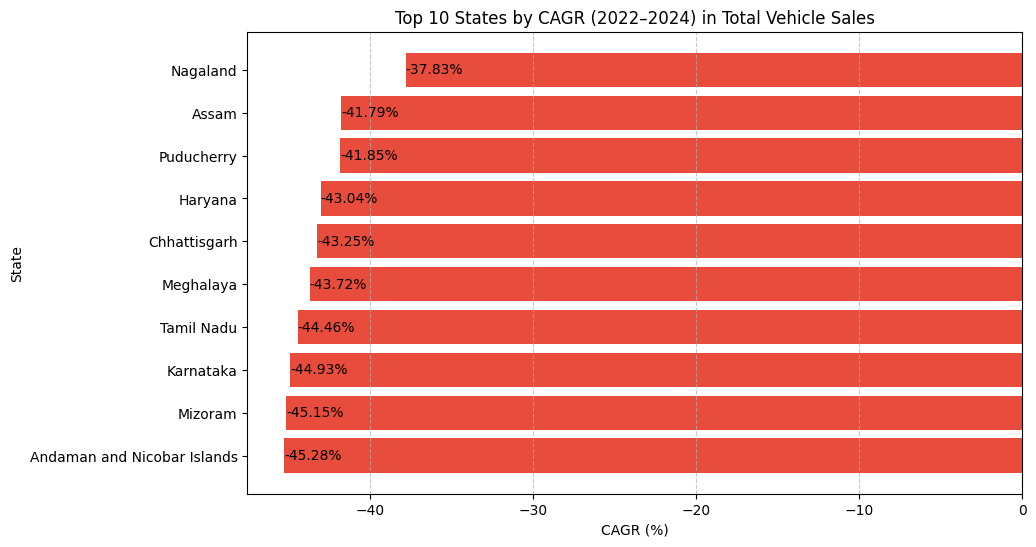

In [23]:
# Sort for plotting
df_top10_sorted = df_top10.sort_values("CAGR")

# Create color mapping: green if positive, red if negative
colors = ["#2ecc71" if val > 0 else "#e74c3c" for val in df_top10_sorted["CAGR"]]

plt.figure(figsize=(10, 6))
plt.barh(df_top10_sorted["state"], df_top10_sorted["CAGR"], color=colors)
plt.xlabel("CAGR (%)")
plt.ylabel("State")
plt.title("Top 10 States by CAGR (2022–2024) in Total Vehicle Sales")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add labels to bars
for index, value in enumerate(df_top10_sorted["CAGR"]):
    plt.text(value, index, f"{value:.2f}%", va="center");

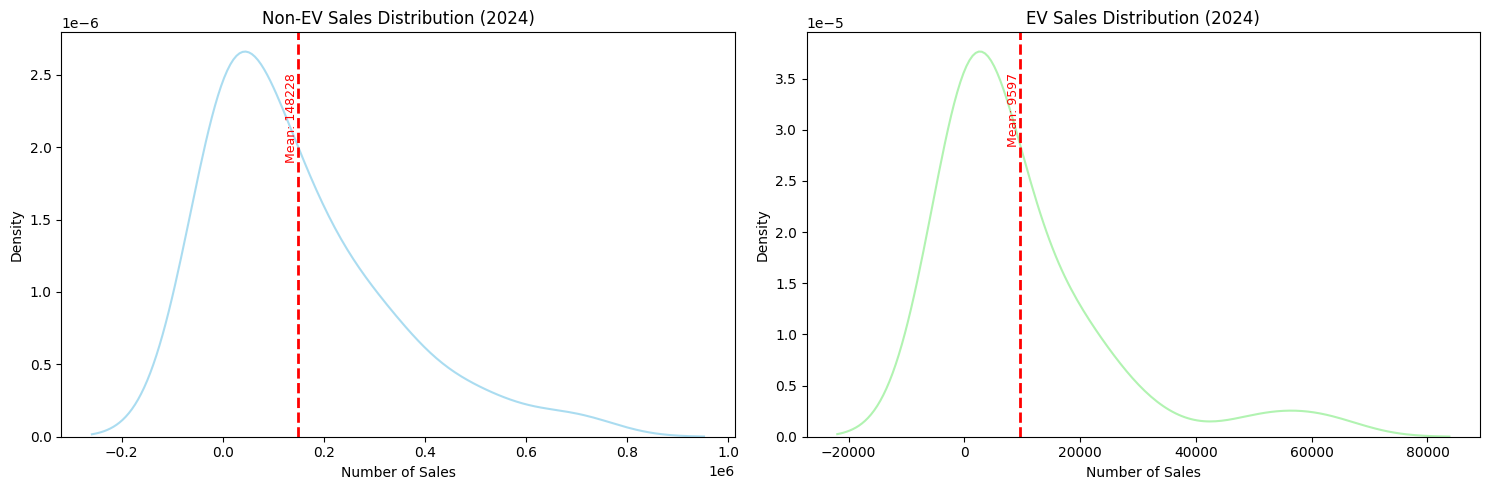

In [24]:
# Calculate means
mean_non_ev = df_pivot['sales_2024'].mean()
mean_ev = ev_state_pt['sales_2024'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Non-EV sales distribution with density curve
sns.kdeplot(data=df_pivot['sales_2024'], alpha=0.7, color='skyblue', ax=ax1)
ax1.axvline(mean_non_ev, color='red', linestyle='--', linewidth=2)
ax1.text(mean_non_ev, ax1.get_ylim()[1]*0.9, f"Mean: {mean_non_ev:.0f}",
         color='red', rotation=90, va='top', ha='right', fontsize=9)
ax1.set_title('Non-EV Sales Distribution (2024)')
ax1.set_xlabel('Number of Sales')
ax1.set_ylabel('Density')

# EV sales distribution with density curve
sns.kdeplot(data=ev_state_pt['sales_2024'], alpha=0.7, color='lightgreen', ax=ax2)
ax2.axvline(mean_ev, color='red', linestyle='--', linewidth=2)
ax2.text(mean_ev, ax2.get_ylim()[1]*0.9, f"Mean: {mean_ev:.0f}",
         color='red', rotation=90, va='top', ha='right', fontsize=9)
ax2.set_title('EV Sales Distribution (2024)') 
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [25]:
import plotly.subplots as sp
import plotly.express as px

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Non-EV Sales", "EV Sales"))

# Non-EV
fig.add_trace(
    px.box(
        df_pivot, y="sales_2024", points="all", color_discrete_sequence=["skyblue"]
    ).data[0],
    row=1,
    col=1,
)

# EV
fig.add_trace(
    px.box(
        ev_state_pt,
        y="sales_2024",
        points="all",
        color_discrete_sequence=["lightgreen"],
    ).data[0],
    row=1,
    col=2,
)

fig.update_layout(title="Distribution of 2024 Vehicle Sales")
fig.show()

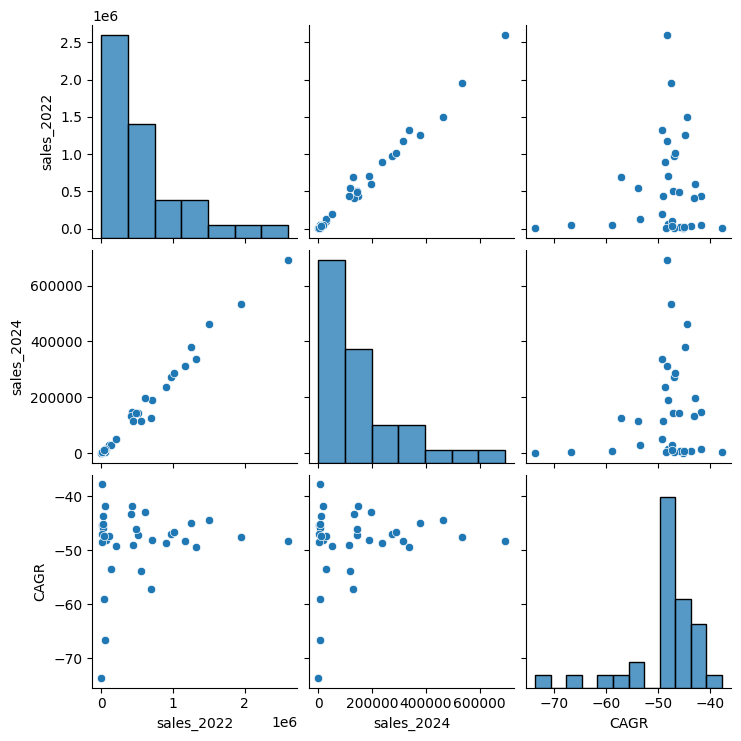

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example with multiple numeric columns
sns.pairplot(df_pivot, vars=["sales_2022", "sales_2024", "CAGR"], kind="scatter")
plt.show()


In [27]:
# Get total vehicles CAGR and EV CAGR
comparison = pd.merge(
    state_sales_pivot[['state', 'CAGR']].rename(columns={'CAGR': 'Total_CAGR'}),
    ev_state_pt[['state', 'CAGR']].rename(columns={'CAGR': 'EV_CAGR'}),
    on='state',
    how='inner'
)

# Sort by EV_CAGR descending
comparison = comparison.sort_values('EV_CAGR', ascending=False)

# Display the comparison
display(comparison.head())


year,state,Total_CAGR,EV_CAGR
2,Arunachal Pradesh,-45.870152,123.61
22,Mizoram,-44.676612,95.79
21,Meghalaya,-43.608763,21.85
23,Nagaland,-37.814902,0.00
7,Dadra and Nagar Haveli and Daman and Diu,-46.560790,-5.49


<Axes: xlabel='Count', ylabel='EV_CAGR'>

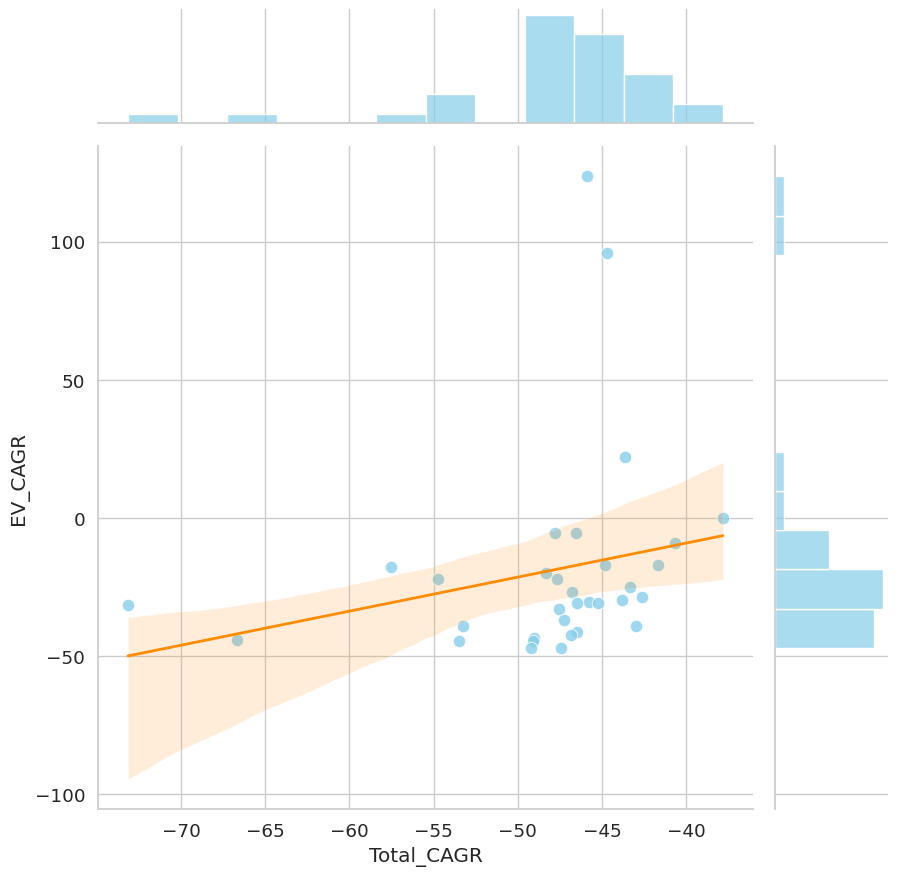

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

# Create the JointGrid for full control
g = sns.JointGrid(
    data=comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    height=9
)

# Main scatter plot without hue
scatter = sns.scatterplot(
    data=comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    color="skyblue",
    s=80,
    alpha=0.8,
    ax=g.ax_joint
)

# Add data labels
for idx, row in comparison.iterrows():
    g.ax_joint.annotate(
        row['state'],
        (row['Total_CAGR'], row['EV_CAGR']),
    scatter=False,
    color="darkorange",
    line_kws={"lw": 2},
    ax=g.ax_joint
)

# Marginal histograms without hue
sns.histplot(
    data=comparison,
    x="Total_CAGR",
    color="skyblue",
    alpha=0.7,
    ax=g.ax_marg_x
)
sns.histplot(
    data=comparison,
    y="EV_CAGR",
    color="skyblue",
    alpha=0.7,
    ax=g.ax_marg_y
)

In [32]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
  comparison,
  x="Total_CAGR",
  y="EV_CAGR",
  hover_data=["state"],  # Add state names to tooltips
  color_discrete_sequence=["skyblue"],
  opacity=0.8,
  size_max=8,
  marginal_x="histogram",
  marginal_y="histogram",
  title="Relationship Between Total Vehicles CAGR and EV CAGR by State",
)

# Add text labels for states
fig.add_trace(
  px.scatter(
    comparison,
    x="Total_CAGR",
    y="EV_CAGR",
    text="state"
  ).update_traces(
    textposition="top center",
    textfont=dict(size=8),
    showlegend=False
  ).data[0]
)

# Update marker style
fig.update_traces(marker=dict(size=10), selector=dict(mode="markers"))

# Add regression line
import numpy as np
from sklearn.linear_model import LinearRegression

X = comparison["Total_CAGR"].values.reshape(-1, 1)
y = comparison["EV_CAGR"].values
model = LinearRegression().fit(X, y)
x_range = np.linspace(comparison["Total_CAGR"].min(), comparison["Total_CAGR"].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

fig.add_traces(
  px.line(x=x_range, y=y_pred, labels={"x": "Total_CAGR", "y": "EV_CAGR"})
  .update_traces(line=dict(color="darkorange", width=3))
  .data
)

# Add reference y = x line
fig.add_shape(
  type="line",
  x0=comparison["Total_CAGR"].min(),
  y0=comparison["Total_CAGR"].min(),
  x1=comparison["Total_CAGR"].max(),
  y1=comparison["Total_CAGR"].max(),
  line=dict(color="crimson", dash="dash", width=2),
)

# Layout tweaks
fig.update_layout(
  title=dict(x=0.5, xanchor="center", font=dict(size=18)),
  xaxis_title="Total Vehicles CAGR (%)",
  yaxis_title="EV CAGR (%)",
  plot_bgcolor="white",
  xaxis=dict(showgrid=True, gridcolor="lightgray"),
  yaxis=dict(showgrid=True, gridcolor="lightgray"),
)

fig.show()

From this **jointplot** showing **Total Vehicles CAGR (%)** vs **EV CAGR (%)**:

### Observations

1. **General Decline in Total Vehicle Sales**

   * The x-axis shows all states having negative Total CAGR values (ranging roughly from -72% to -40%).
   * This confirms your earlier finding: **no state had positive growth in overall vehicle sales** between 2022 and 2024.

2. **Variation in EV CAGR**

   * The y-axis shows a wider spread for EV CAGR — some states have **positive EV growth** (up to ~~120%), while others are strongly negative (~~-100%).
   * This suggests **EV adoption trends are not strongly tied to the overall vehicle sales trend**.

3. **Weak Positive Relationship**

   * The regression line slopes slightly upward, meaning states with **less negative total CAGR** tend to have **slightly better EV CAGR**, but the correlation looks weak.
   * The confidence interval is quite wide, especially toward the extremes, indicating high variability and low predictive strength.

4. **Clusters**

   * Most states cluster in the bottom-right quadrant: **moderately negative Total CAGR (-50% to -40%)** and **negative EV CAGR (-50% to 0%)**.
   * A few outlier states in the top area (positive EV CAGR) are likely the ones leading EV adoption despite market contraction.

In [30]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the main scatter plot
fig = make_subplots(
  rows=2, cols=2,
  column_widths=[0.7, 0.3],
  row_heights=[0.3, 0.7],
  vertical_spacing=0.02,
  horizontal_spacing=0.02,
  specs=[[None, {"type": "histogram"}],
       [{"type": "histogram2d"}, None]]
)

# Add 2D histogram
fig.add_trace(
  go.Histogram2d(
    x=df_pivot['sales_2022'],
    y=df_pivot['sales_2024'],
    colorscale='Viridis',
    nbinsx=25,
    nbinsy=25,
    colorbar=dict(title='Count')
  ),
  row=2, col=1
)

# Add marginal histograms
fig.add_trace(
  go.Histogram(x=df_pivot['sales_2022'], nbinsx=25),
  row=1, col=2
)

# Update layout
fig.update_layout(
  title='Vehicle Sales Distribution: 2022 vs 2024',
  showlegend=False,
  width=800,
  height=800,
  xaxis=dict(title='Sales 2022'),
  xaxis2=dict(title='Count'),
  yaxis=dict(title='Sales 2024')
)

fig.show()


### Distribution Analysis of Vehicle Sales (2022-2024)

#### Key Findings:

1. **Traditional Vehicle Sales (Non-EV)**
  - Shows a broader distribution with higher sales volumes
  - Mean sales in 2024: ~148,228 units
  - Indicates mainstream market dominance
  - All states show negative CAGR, ranging from -37.8% to -73.6%

2. **Electric Vehicle Sales**
  - Much smaller distribution with lower volumes
  - Mean sales in 2024: ~9,597 units
  - Shows emerging market characteristics
  - Mixed CAGR performance:
    - Some states show positive growth (up to 123.6%)
    - Others show moderate decline (-5% to -17%)

3. **Regional Contrasts**
  - Top EV growth: Arunachal Pradesh (123.6%), Mizoram (95.7%)
  - Most resilient non-EV markets: Nagaland (-37.8%), Puducherry (-40.6%)
  - Shows distinct adoption patterns between EV and traditional vehicles

4. **Market Transition**
  - While traditional vehicle sales decline universally
  - EV segment shows pockets of growth
  - Indicates early stages of market transformation

In [31]:
import os

# Create paths if they don't exist
if not os.path.exists('../../data/visuals'):
  os.makedirs('../../data/visuals')

# Export top 10 state CAGR for total vehicles
state_cagr_top10.to_csv('../../data/visuals/top10_total_vehicles_cagr.csv', index=False)

# Export top 10 EV CAGR 
top_10_ev_CAGR.to_csv('../../data/visuals/top10_ev_cagr.csv', index=False)

# Export top 10 non-EV CAGR
df_top10.to_csv('../../data/visuals/top10_non_ev_cagr.csv', index=False)